# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [15]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [121]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [123]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [124]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [125]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [126]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [127]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

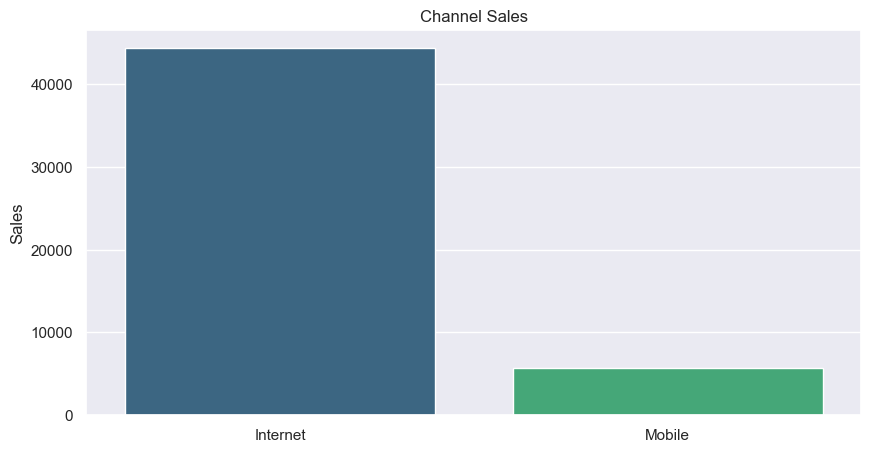

In [128]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['sales_channel'].value_counts().index, y=df['sales_channel'].value_counts().values, palette='viridis', hue=df['sales_channel'].value_counts().index)
plt.title("Channel Sales")
plt.xlabel(None)
plt.ylabel("Sales")
plt.show()

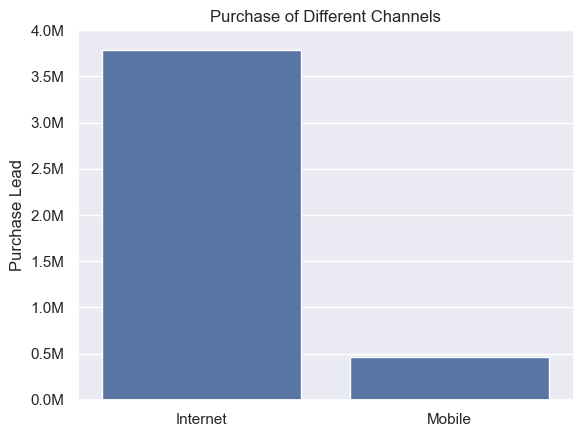

In [129]:
channel_purchase_lead = df.groupby('sales_channel')['purchase_lead'].sum()
sns.barplot(data=channel_purchase_lead)
plt.title("Purchase of Different Channels")
plt.xlabel(None)
plt.ylabel("Purchase Lead")

yticks = plt.gca().get_yticks()
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels([f'{(tick/1e6)}M' for tick in yticks])

plt.show()

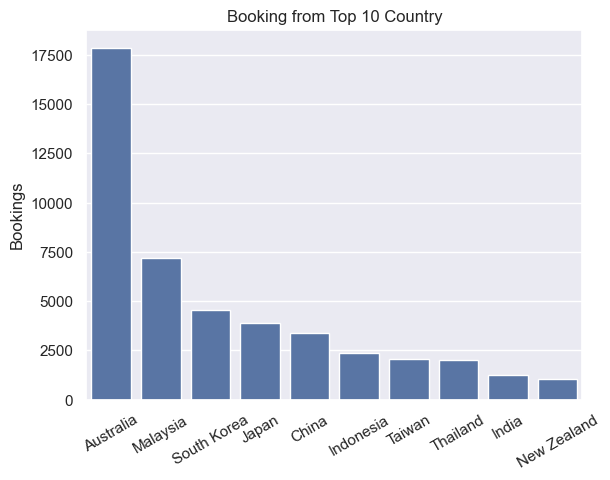

In [130]:
sns.barplot(x=df['booking_origin'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10)['booking_origin'], y=df['booking_origin'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10)['count'])
plt.xticks(rotation = 30)
plt.title("Booking from Top 10 Country")
plt.xlabel(None)
plt.ylabel("Bookings")
plt.show()

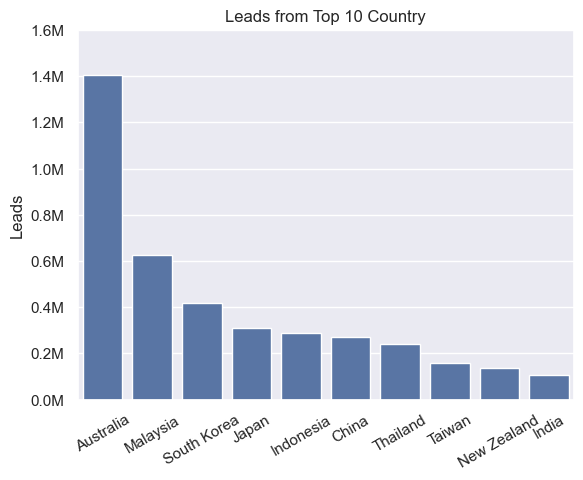

In [131]:
country_purchase_leads = df.groupby('booking_origin')['purchase_lead'].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x=country_purchase_leads['booking_origin'], y=country_purchase_leads['purchase_lead'])
plt.xticks(rotation = 30)
plt.title("Leads from Top 10 Country")
plt.xlabel(None)

yticks = plt.gca().get_yticks()
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels([f'{(tick/1e6)}M' for tick in yticks])

plt.ylabel("Leads")
plt.show()

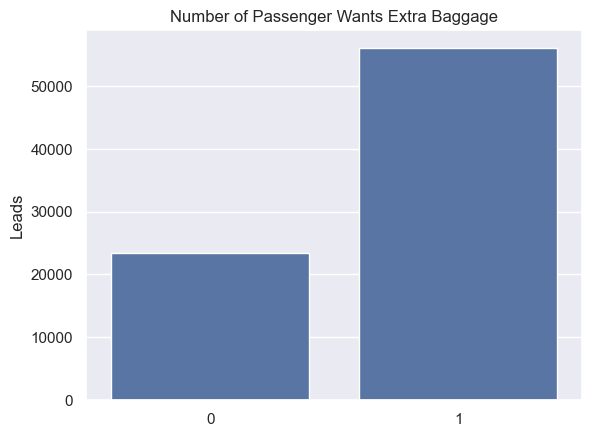

In [132]:
people_wants_extra_baggage = df.groupby('wants_extra_baggage')['num_passengers'].sum().reset_index()

sns.barplot(x=people_wants_extra_baggage['wants_extra_baggage'], y=people_wants_extra_baggage['num_passengers'])
plt.title("Number of Passenger Wants Extra Baggage")
plt.xlabel(None)

plt.ylabel("Leads")
plt.show()

In [133]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [134]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [135]:
le = LabelEncoder()
df['sales_channel'] = le.fit_transform(df['sales_channel'])
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,0,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,0,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,0,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,0,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [136]:
df['trip_type'] = le.fit_transform(df['trip_type'])

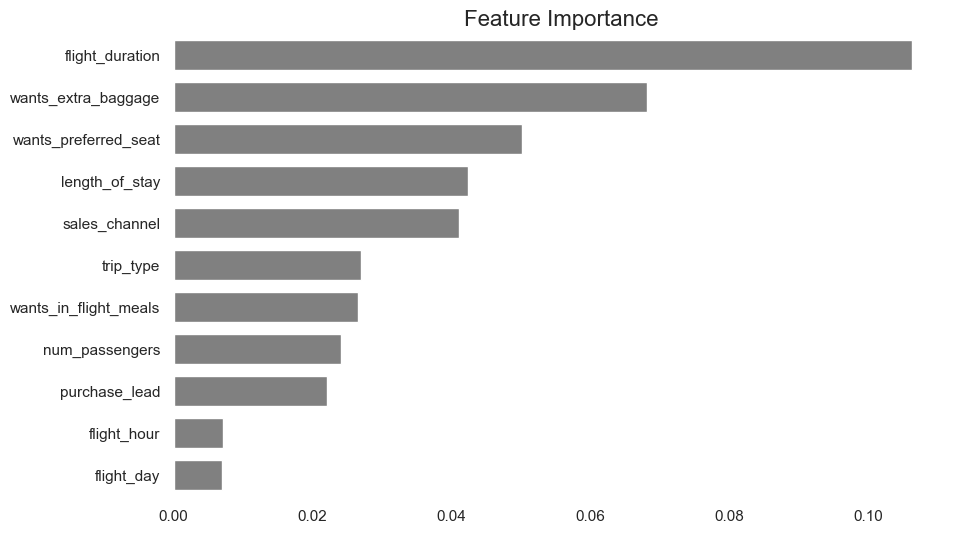

In [151]:
correlation = df.select_dtypes(exclude='object').corr()['booking_complete'].drop('booking_complete').abs()
correlation_sorted = correlation.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_sorted.values, y=correlation_sorted.index, color='gray', width=0.7)

plt.title('Feature Importance', fontsize=16)
plt.xlabel(None) 
plt.ylabel(None) 
plt.grid(False)  
plt.gca().set_facecolor('white') 

plt.show()


<Axes: >

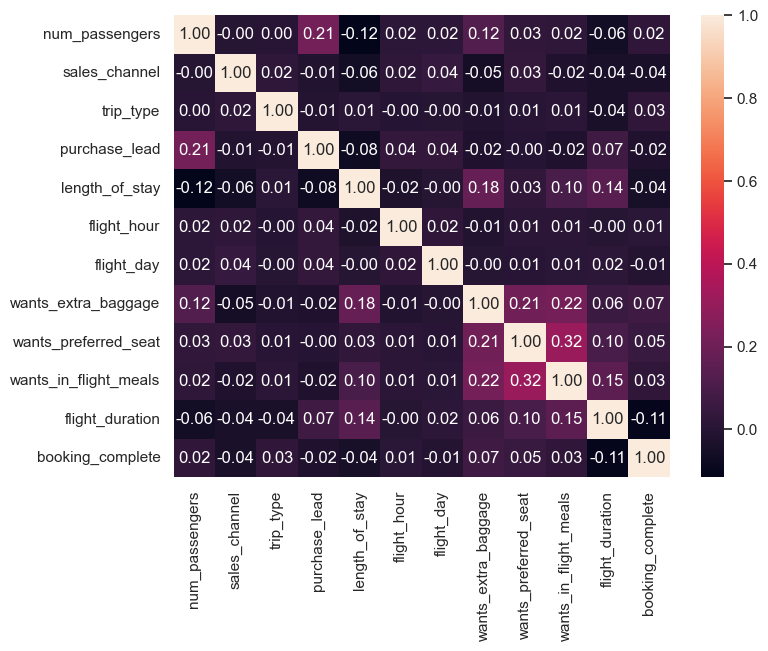

In [137]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, fmt='.2f')

In [138]:
model_cols = df.select_dtypes(exclude='object')

In [139]:
model_cols.head(1)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,1,0,0,5.52,0


In [140]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [141]:
X = model_cols.drop(columns='booking_complete')
y = model_cols['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [142]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [143]:
# scaler = StandardScaler()
# X_train_resampled = scaler.fit_transform(X_train_resampled)
# X_test = scaler.transform(X_test)

In [144]:
log_model = LogisticRegression()
log_model.fit(X_train_resampled, y_train_resampled)

c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [145]:
y_pred = log_model.predict(X_test)
print(log_model.score(X_test, y_test))
print(classification_report(y_true=y_test, y_pred=y_pred))  

0.5606666666666666
              precision    recall  f1-score   support

           0       0.87      0.57      0.69     12757
           1       0.17      0.50      0.25      2243

    accuracy                           0.56     15000
   macro avg       0.52      0.53      0.47     15000
weighted avg       0.76      0.56      0.62     15000



In [146]:
rand_model = RandomForestClassifier()
rand_model.fit(X_train_resampled, y_train_resampled)
rand_model.score(X_test, y_test)

0.7810666666666667

In [147]:
print(classification_report(y_true=y_test, y_pred=rand_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     12757
           1       0.24      0.21      0.22      2243

    accuracy                           0.78     15000
   macro avg       0.55      0.55      0.55     15000
weighted avg       0.77      0.78      0.78     15000



## Five number summary
1. minimum
2. Q1 (25th percentile)
3. Q2 (50th percentile)
4. Q3 (75th percentile)
5. maximum

In [1]:
import pandas as pd

In [8]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
data = df[['purchase_lead']]
min(data['purchase_lead']), max(data['purchase_lead'])

(0, 867)

In [9]:
import numpy as np
np.percentile(data['purchase_lead'], 25)

np.float64(21.0)

In [10]:
np.percentile(data['purchase_lead'], 50)

np.float64(51.0)

In [11]:
np.percentile(data['purchase_lead'], 75)

np.float64(115.0)

In [12]:
data['purchase_lead'].describe(

)

count    50000.000000
mean        84.940480
std         90.451378
min          0.000000
25%         21.000000
50%         51.000000
75%        115.000000
max        867.000000
Name: purchase_lead, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2069a882450>,
 'caps': [<matplotlib.lines.Line2D at 0x2069ab6dd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x20691e614c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2069ab6e270>],
 'fliers': [<matplotlib.lines.Line2D at 0x2069ab6e4e0>],
 'means': []}

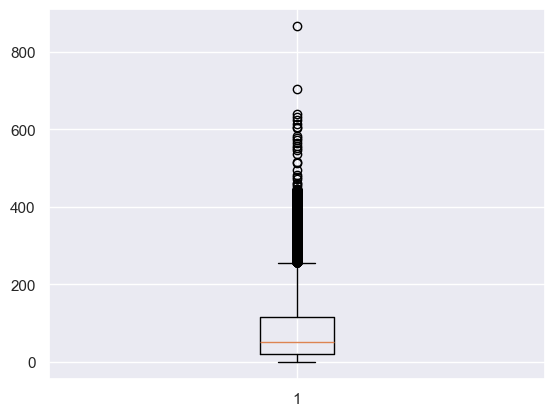

In [16]:
plt.boxplot(data['purchase_lead'])